In [10]:
from IPython.display import Image

# qbiome imports
import qbiome
from qbiome.data_formatter import DataFormatter
from qbiome.quantizer import Quantizer
from qbiome.qnet_orchestrator import QnetOrchestrator
from qbiome.mask_checker import MaskChecker
from qbiome.forecaster import Forecaster
from qbiome.hypothesis import Hypothesis
from qbiome.qutil import customDataFormatter

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
sns.set_theme()
plt.style.use('ggplot')

In [11]:
# the directory to save the dotfiles to
outdirname = 'dotfiles_1_class_ALPH_2'

# Load exisiting quantizer and a pre-trained qnet

In [18]:
dirname = 'example_data/'
data = '../../infbiome_/data/HC/hc_Class_GTDB_denoised_filtered_percent.csv'
meta = dirname + 'hc_metadata.csv'
BIOMES=None
#BIOMES=['Actinobacteriota', 'Bacteroidota', 'Firmicutes', 'Proteobacteria', 'Fusobacteriota']

data,property_map=customDataFormatter(data,meta,
                        META_PROP=['hc', 'HCZ', 'sex', 'hc_Birth',
           'HCZ_Birth', 'hc_Discharge', 'HCZ_Discharge',
           'HCZ_discharge_birth_difference', 'HCZ_Category',
           'HCZ_difference_Category', 'NEC', 'IVH', 'ROP', 'BPD', 'Infection',
           'total_Morbidities', 'Morbidity_Category', 'TIMPS score',
           'TIMPS z-score', 'TIMPS Category'],
                        COL_SELECT={"Samples": "sample_id", "PTID": "subject_id", "PMA":"week"},
                                      BIOMES=BIOMES)

data_=data.assign(source='gnd')
quantizer = Quantizer(num_levels=5)
qnet_orchestrator = QnetOrchestrator(quantizer)

quantized = quantizer.quantize_df(data)
features, label_matrix = quantizer.get_qnet_inputs(quantized)
dequantized = quantizer.dequantize_to_df(label_matrix)
dequantized_plot = quantizer.melt_into_plot_format(dequantized)
quantizer.fit_random_forest(data, dequantized_plot)
quantizer.save_quantizer_states('quantizer_dataset1_class_A5.pkl')

In [13]:
#quantizer = Quantizer()
#quantizer.load_quantizer_states('quantizer.pkl')

#qnet_orchestrator = QnetOrchestrator(quantizer)
#qnet_orchestrator.load_qnet('data1_class_0.joblib')
qnet_orchestrator.load_qnet('data1_class_ALPH_2_0.joblib')

# Export dotfiles

In [14]:
import os
if not os.path.isdir(outdirname):
    os.makedirs(outdirname)

In [16]:
qnet_orchestrator.export_qnet_tree_dotfiles(outdirname)

# Inspect a dotfile

In [17]:
! cd 'dotfiles_1_class_ALPH_2'; for i in `ls *dot`; do dot -Tpng $i -o ${i/dot/png}; done

In [5]:
!dot -Tpng dotfiles/Actinobacteriota_14.dot -o dotfiles/Actinobacteriota_14.png

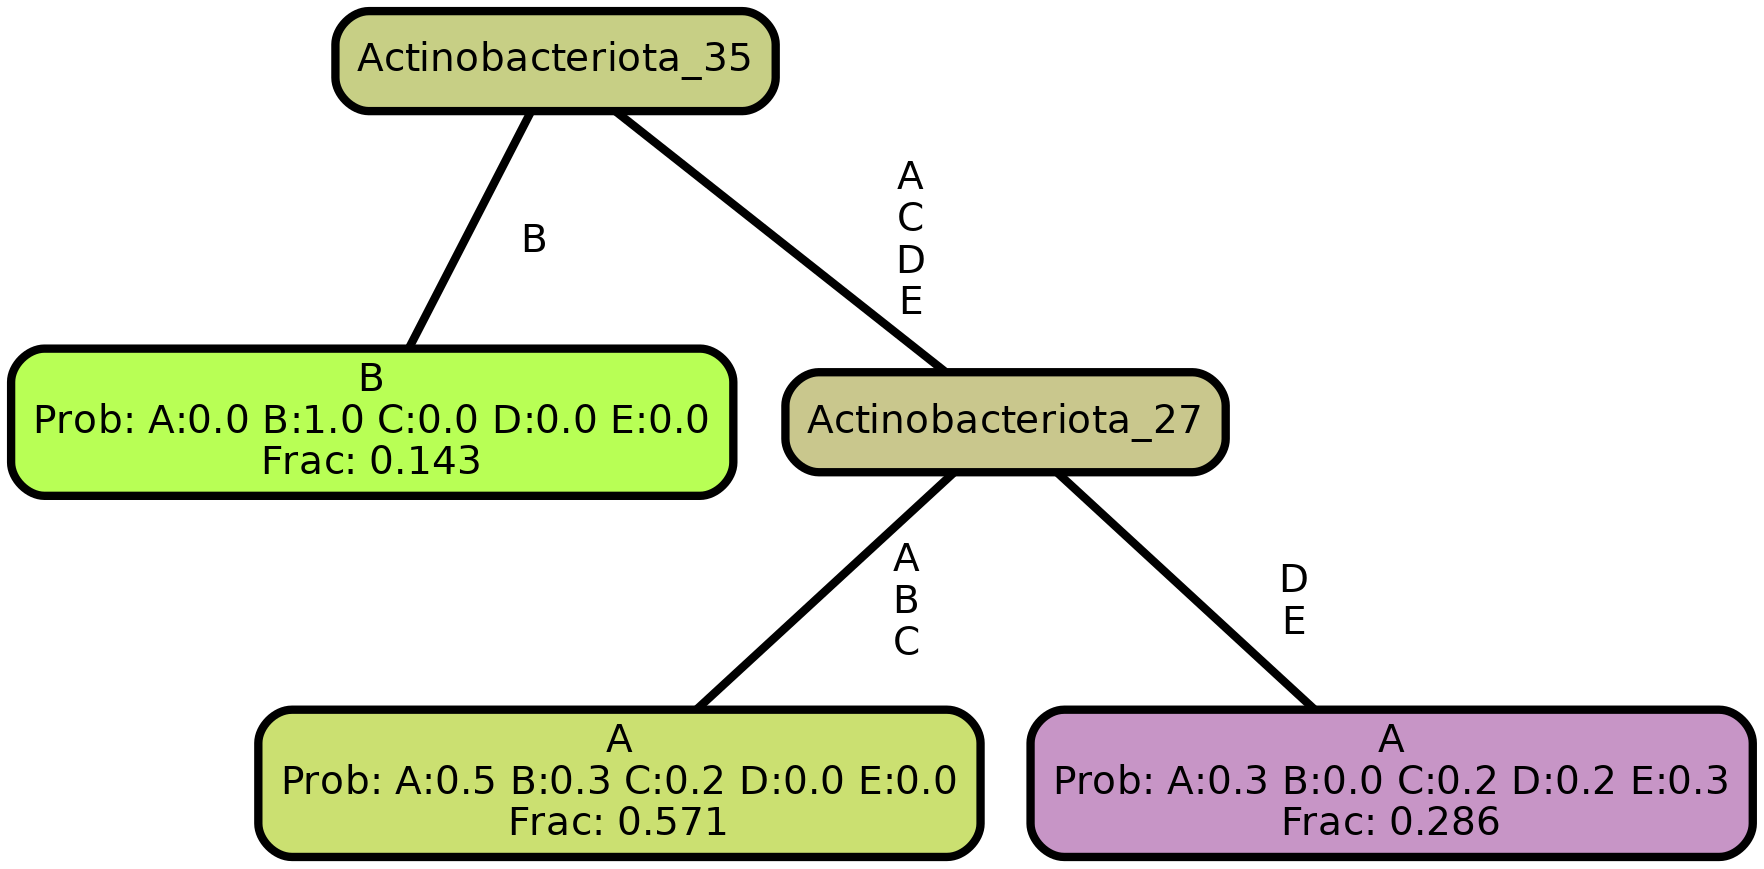

In [6]:
Image('dotfiles/Actinobacteriota_14.png')

In [10]:
# !rm dotfiles/*.png